### Problem Statement
Implement linear regression for predicting house prices based on given features using:
    - Batch gradient descent (BGD)
    - Stochastic Gradient descent (SGD)
    - The normal equation


#### Things to do:
    - Dataset preprocessing
        - Normalize features (this is new to me and I need to understand this!)
            - Essentially, scale the input features such that they have a similar range (learn about this before you code)
        - Adding a bias term to our X (design matrix) - you figure this one out. Essentially adding a column of ones, but figure out why

    - Linear regression implementation
        - Batch gradient descent (to minimize cost function)
        - Stochastoc gradient descent (compare performance with bgd)
        - Normal equation - compute theta instantly

    - Compare the theta values of all the three methods.

In [83]:
from sklearn.datasets import fetch_california_housing
import numpy as np

housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
print(housing.feature_names[0:6])

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']


In [84]:
print(housing.target_names)
print(housing.feature_names)
print(housing.data[1][1])

['MedHouseVal']
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
21.0


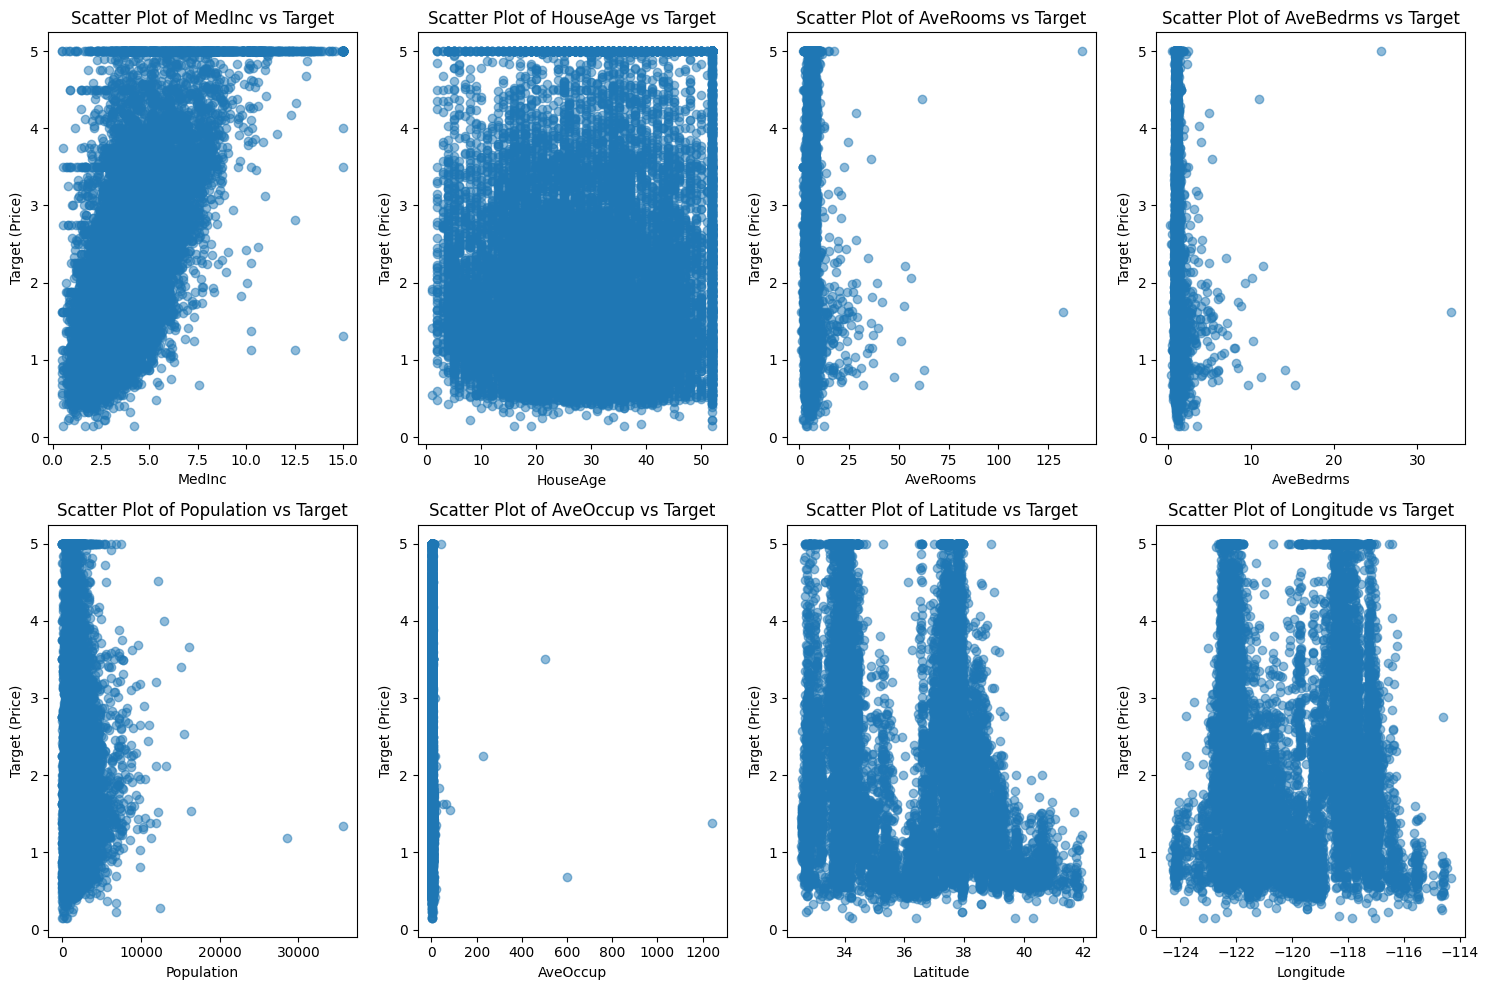

In [85]:
import matplotlib.pyplot as plt

# Number of features
num_features = len(housing.feature_names)

# Create subplots
fig, axes = plt.subplots(2, (num_features + 1) // 2, figsize=(15, 10))  
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Loop through each feature and plot
for column in range(num_features):
    ax = axes[column]
    ax.scatter(housing.data[:, column], housing.target, alpha=0.5)
    ax.set_xlabel(housing.feature_names[column])
    ax.set_ylabel("Target (Price)")
    ax.set_title(f"Scatter Plot of {housing.feature_names[column]} vs Target")

# Adjust layout
plt.tight_layout()
plt.show()


In [86]:
# Min-max scaling normalization
for column in range(0, len(housing.feature_names)):
    # Number ranging from 0 to 7
    x_max = max(housing.data[:, column])
    x_min = min(housing.data[:, column])

    for row in range(0, len(housing.data[:, column])):
         x = housing.data[row, column]
         housing.data[row, column] = (x - x_min) / (x_max - x_min) 

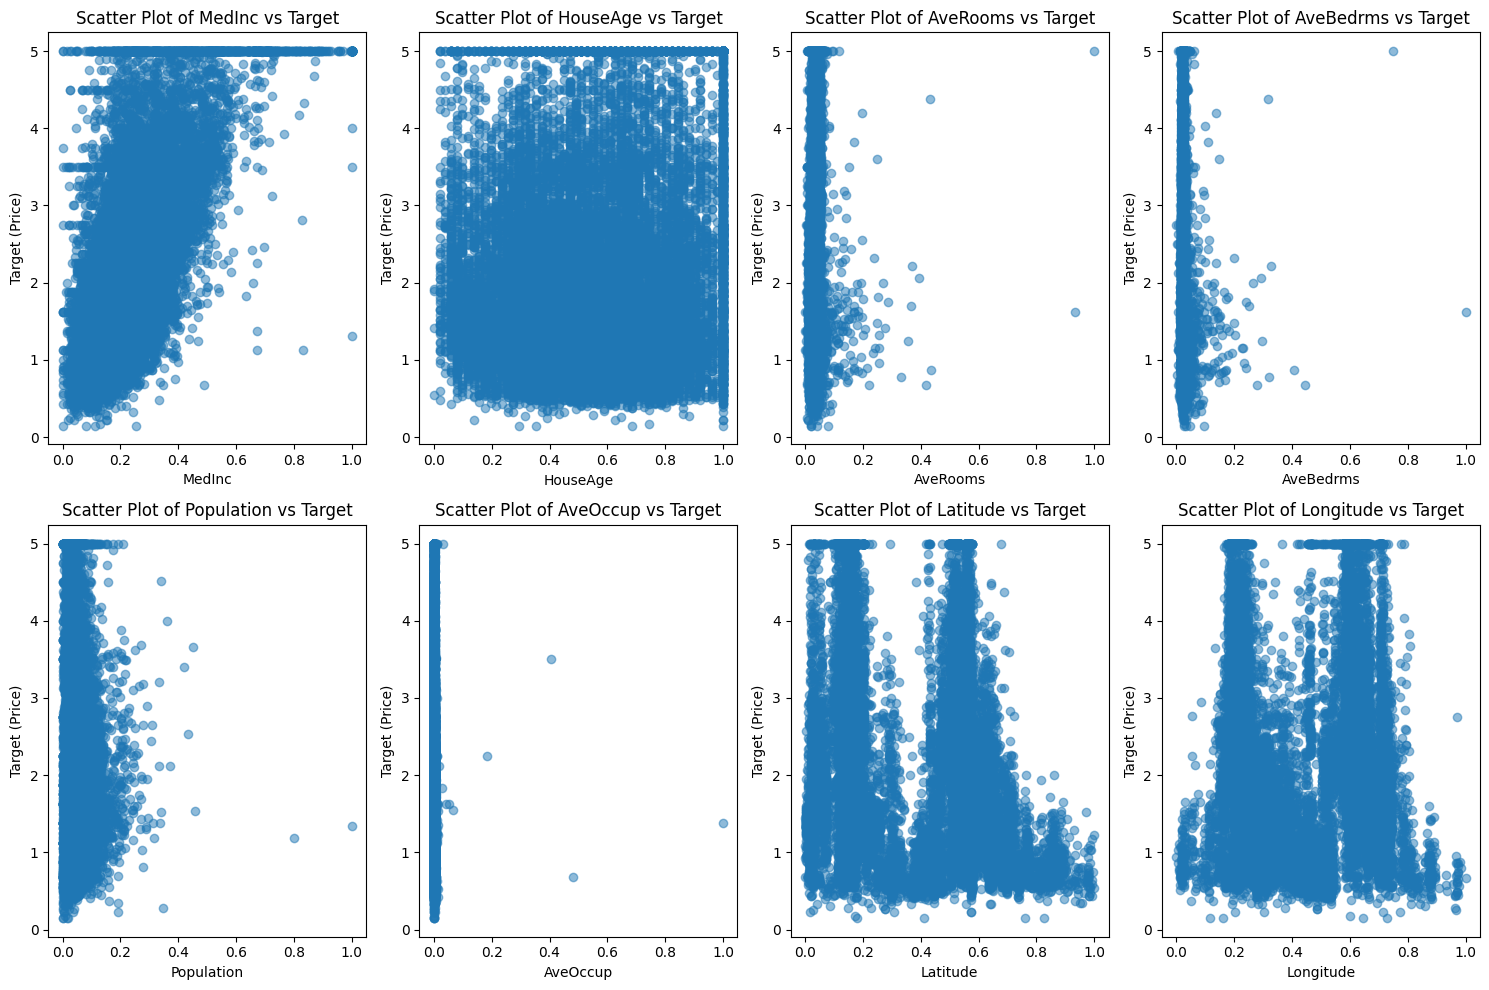

In [87]:
import matplotlib.pyplot as plt

# Number of features
num_features = len(housing.feature_names)

# Create subplots
fig, axes = plt.subplots(2, (num_features + 1) // 2, figsize=(15, 10))  
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Loop through each feature and plot
for column in range(num_features):
    ax = axes[column]
    ax.scatter(housing.data[:, column], housing.target, alpha=0.5)
    ax.set_xlabel(housing.feature_names[column])
    ax.set_ylabel("Target (Price)")
    ax.set_title(f"Scatter Plot of {housing.feature_names[column]} vs Target")

# Adjust layout
plt.tight_layout()
plt.show()


In [88]:
ones = np.ones((housing.data.shape[0], 1))
housing.data = np.hstack((housing.data, ones))

In [89]:
y_min = min(housing.target)
y_max = max(housing.target)

target_normalized = []
for i in range(len(housing.target)):
    y = housing.target[i]
    target_normalized.append(round((y - y_min) / (y_max - y_min), 3))

print(target_normalized)

[np.float64(0.902), np.float64(0.708), np.float64(0.695), np.float64(0.673), np.float64(0.675), np.float64(0.525), np.float64(0.586), np.float64(0.467), np.float64(0.436), np.float64(0.507), np.float64(0.549), np.float64(0.468), np.float64(0.409), np.float64(0.364), np.float64(0.297), np.float64(0.258), np.float64(0.284), np.float64(0.29), np.float64(0.296), np.float64(0.305), np.float64(0.273), np.float64(0.299), np.float64(0.204), np.float64(0.175), np.float64(0.242), np.float64(0.191), np.float64(0.162), np.float64(0.187), np.float64(0.194), np.float64(0.241), np.float64(0.221), np.float64(0.207), np.float64(0.197), np.float64(0.185), np.float64(0.195), np.float64(0.169), np.float64(0.185), np.float64(0.183), np.float64(0.364), np.float64(0.332), np.float64(0.289), np.float64(0.278), np.float64(0.214), np.float64(0.358), np.float64(0.349), np.float64(0.345), np.float64(0.263), np.float64(0.253), np.float64(0.356), np.float64(0.201), np.float64(0.324), np.float64(0.162), np.float64(0

In [90]:
print(housing.data[0, :])

[0.53966842 0.78431373 0.0435123  0.02046866 0.00894083 0.00149943
 0.5674814  0.21115538 1.        ]


In [101]:
# Implementing linear regression
m = len(housing.data[:, 0])
n = len(housing.feature_names)
theta = [0] * (n + 1) # Where, the last column can be considered as the extra theta (the constant value)

# Let's keep our criterion for convergence to be when the change in cost function goes below a certain threshold.
# Hypothesis
h = [0] * m
for index in range(m):
    h[index] = sum([theta[j] * housing.data[index, j] for j in range(len(theta))])

learning_rate = 0.8

# Cost
cost = (1 / (2 * m)) * sum([(h[i] - target_normalized[i]) ** 2 for i in range(m)])
new_cost = 1
max_iterations = 3000
iterations = 0
print(cost, new_cost)
# Either use a fixed number of iterations or a better convergence criterion
while iterations < max_iterations and (iterations < 10 or abs(cost - new_cost) / cost > 1e-6):
    # Forgetting old cost
    cost = new_cost
    # Gradient updates
    for j in range(len(theta)):
        theta[j] -=  learning_rate * ((1 / m) * sum([(h[i] - target_normalized[i]) * housing.data[i, j] for i in range(m)]))
    
    # Hypothesis updates with new gradients
    for index in range(m):
        h[index] = sum([theta[j] * housing.data[index, j] for j in range(len(theta))])
    
    # Modifying cost function
    new_cost = (1 / (2 * m)) * sum([(h[i] - target_normalized[i]) ** 2 for i in range(m)])
    iterations += 1

    if iterations % 10 == 0:
        print(cost, new_cost)
print(cost, new_cost)

0.10654627688953591 1
0.02440853412693309 0.02409986056054846
0.021678102334024424 0.02144417458439783
0.019599905754128455 0.019421075450736982
0.01800796761158758 0.017870666618984517
0.016784055778156073 0.01667831380222368
0.015840272397414416 0.0157585923347347
0.015110235195410956 0.015046930699351735
0.01454350775153695 0.014494250803541874
0.0141016724035203 0.014063163689748522
0.013755431743895654 0.013725154159832241
0.013482429479833047 0.013458461797158743
0.013265599288402213 0.013246474623589459
0.013091909280139312 0.013076507346378483
0.012951405624321944 0.012938870607547458
0.012836483400856793 0.012826161327700392
0.012741330425446592 0.012732721380826293
0.012661502902699026 0.012654224569525398
0.01259360161267392 0.012587361447923367
0.012535024791924698 0.012529598792025122
0.012483779534124497 0.012478996028490593
0.01243833784721695 0.012434065128938866
0.012397526790196843 0.012393663675120467
0.012360444618675552 0.012356913239394248
0.012326396780161033 0.0

In [104]:
for entry in range(30):
    calculated = sum([theta[index] * housing.data[entry, index] for index in range(len(theta))])
    print(calculated, target_normalized[entry])

0.8102693901112112 0.902
0.767325389857702 0.708
0.7542417266517479 0.695
0.6276714885565312 0.673
0.4882570430819251 0.675
0.5022852775819909 0.525
0.4719664003883913 0.586
0.4311095482419002 0.467
0.3313102212884419 0.436
0.4747005134021358 0.507
0.43835016185414677 0.549
0.44222710998615244 0.468
0.4274407578433217 0.409
0.3974453560292076 0.364
0.336440576664896 0.297
0.3494757399681524 0.258
0.4060047772326657 0.284
0.35284078580895767 0.29
0.34084407613594647 0.296
0.39362747389938824 0.305
0.2714599410970139 0.273
0.3017181299958006 0.299
0.325397775280647 0.204
0.35992262732540314 0.175
0.39257249802258004 0.242
0.35501378332740685 0.191
0.37527268099939615 0.162
0.3307480014023091 0.187
0.31431300583031196 0.194
0.3222798164462557 0.241
